In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
siniestros = pd.read_csv('siniestros_viales.csv')

In [3]:
siniestros["Num_victimas"].describe()

count    717.000000
mean       1.061367
std        0.257024
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num_victimas, dtype: float64

Realizo una distribucion para determinar el mayor numero de victimas 

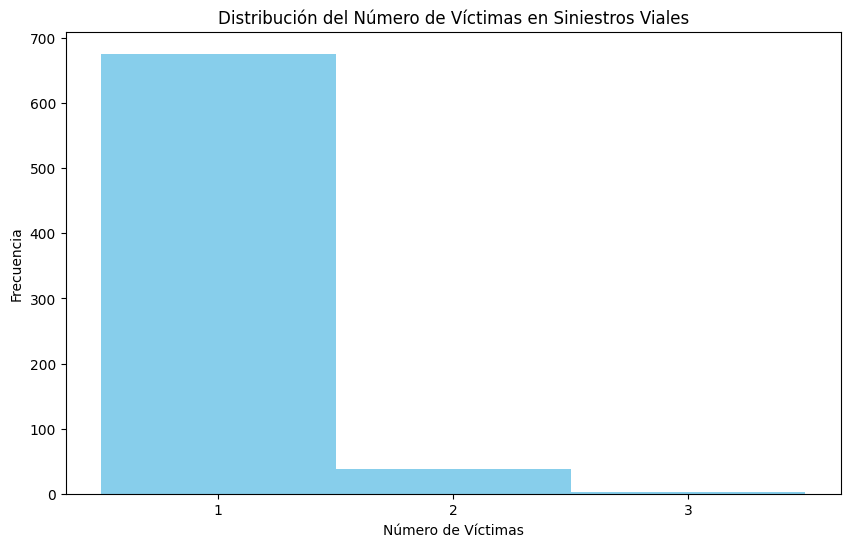

In [4]:
# Visualizar un histograma del número de víctimas
plt.figure(figsize=(10, 6))
plt.hist(siniestros['Num_victimas'], bins=range(1,5), color='skyblue')
plt.title('Distribución del Número de Víctimas en Siniestros Viales')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.xticks([tick + 0.5 for tick in range(1, 4)], range(1, 4))
plt.show()

En esta Distribucion se denota que casi el 80% de victimas son 1. es muy poco probable que haya 3 victimas fatales por siniestro

In [5]:
siniestros["Num_victimas"].sum()

761

In [6]:
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  717 non-null    object 
 2   Año                    717 non-null    int64  
 3   Mes                    717 non-null    int64  
 4   Dia                    717 non-null    int64  
 5   Dia semana             717 non-null    object 
 6   Hora                   716 non-null    float64
 7   Num_victimas           717 non-null    int64  
 8   Participantes          717 non-null    object 
 9   Rol                    717 non-null    object 
 10  Acusado                717 non-null    object 
 11  Victima                717 non-null    object 
 12  Sexo                   717 non-null    object 
 13  Edad                   717 non-null    float64
 14  Rango etario           717 non-null    object 
 15  Fecha 

In [7]:
siniestros["Hora"] = siniestros["Hora"].fillna(0.0)

In [8]:
siniestros["Hora"] = siniestros["Hora"].astype("Int64")

In [9]:
siniestros.isnull().sum()

Id                         0
Fecha                      0
Año                        0
Mes                        0
Dia                        0
Dia semana                 0
Hora                       0
Num_victimas               0
Participantes              0
Rol                        0
Acusado                    0
Victima                    0
Sexo                       0
Edad                       0
Rango etario               0
Fecha fallecimiento       69
Lugar del hecho            0
Tipo de calle              0
Calle                      1
Cruce                    177
Dirección normalizada      9
Comuna                     0
Barrios                    2
X caba                     0
Y caba                     0
Pos x                     13
Pos y                     13
dtype: int64

In [10]:
siniestros.duplicated().sum()

0

Realizo una deteccion de outliers con boxplot 

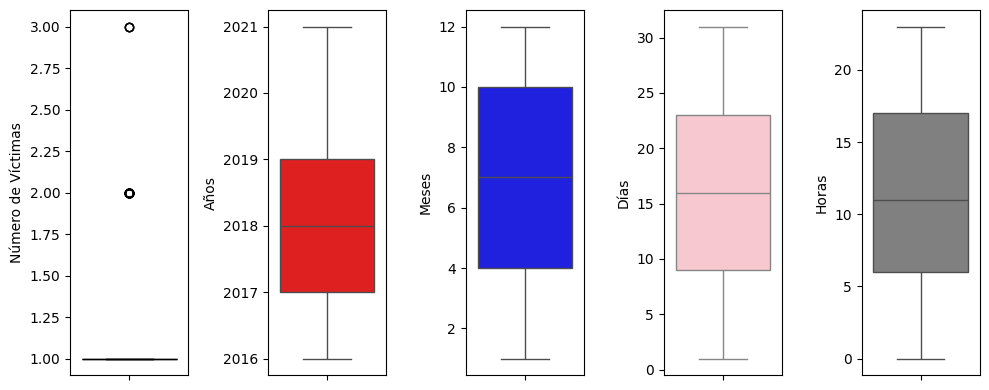

In [11]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=siniestros, y='Num_victimas', color = "black")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=siniestros, y='Año', color = "red")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=siniestros, y='Mes', color = "blue")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=siniestros, y='Dia', color = "pink")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=siniestros, y='Hora', color = "grey")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

Los outliers que se en encuentran en el numero de victimas es debido a que el mayor numero de victimas es 1 con respecto a las demas. 
Tambien se denota que el grueso de victimas se dio entre 2017 y 2019.En el siguiente grafico se puede apreciar esta conclusion

In [12]:
# Agrupar por año y mes, sumar el número de víctimas y reiniciar el índice
vic_tiempo = siniestros.groupby(['Año', 'Mes'])['Num_victimas'].sum().reset_index()
vic_tiempo

,Año,Mes,Num_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


Hago una distribucion para determinar el numero de victimas en el tiempo

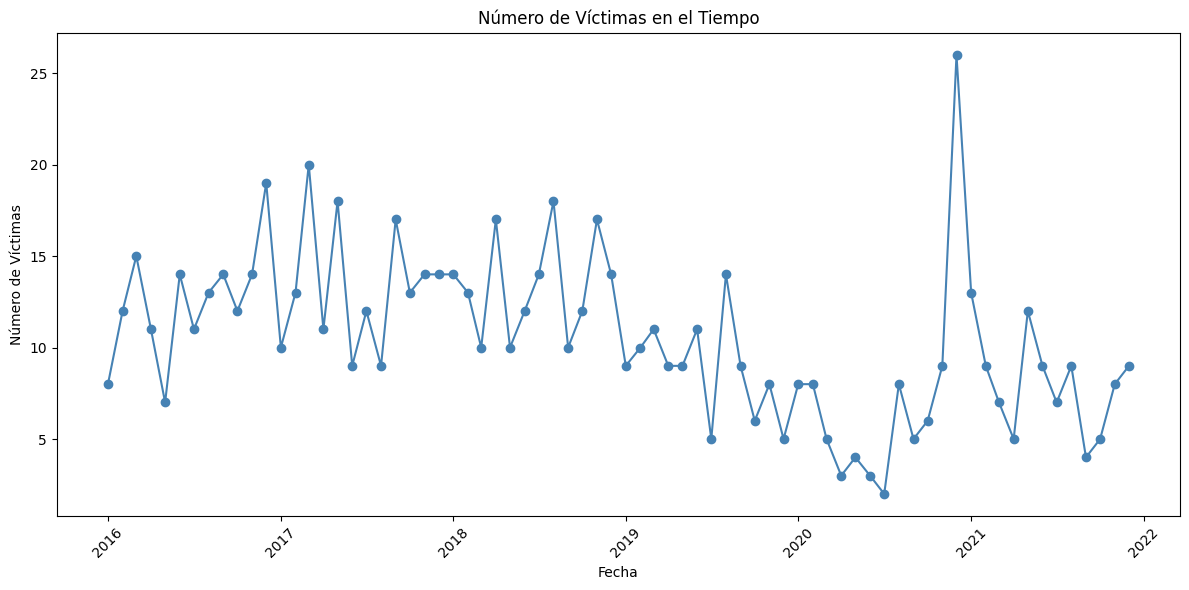

In [13]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
vic_tiempo["Fecha"] = vic_tiempo["Año"].astype(str) + '-' + vic_tiempo["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
vic_tiempo["Fecha"] = pd.to_datetime(vic_tiempo["Fecha"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
vic_tiempo = vic_tiempo.sort_values("Fecha")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(vic_tiempo["Fecha"], vic_tiempo["Num_victimas"], marker='o', color='steelblue')

# Añadir títulos y etiquetas
plt.title('Número de Víctimas en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Como intuía, el mayor número de víctimas en promedio se registró entre 2017 y 2019. En 2020, hubo un marcado descenso en el número de muertes, lo cual asumo que puede estar relacionado con el inicio de la pandemia de COVID-19. A finales de 2020, se observó un pico significativamente alto de víctimas, lo cual podría indicar eventos específicos o cambios en las condiciones de tráfico.

Gracias a la información proporcionada en esta fuente (https://www.minfra.gba.gob.ar/web/seguridadVial/Informe%202019%20Estadisticas%20en%20Seguridad%20Vial.pdf), pude confirmar mi hipótesis inicial.

Realizo una distribucion de victimas por mes para determinar los meses con mayores victimas

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15040\3841223754.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='Num_victimas', data=barras, palette="winter")


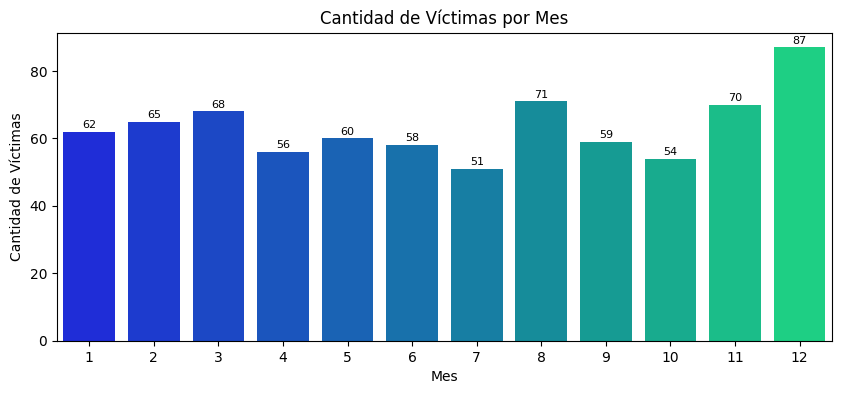

In [14]:
# Se agrupa por la cantidad de víctimas por mes
barras = siniestros.groupby(['Mes'])['Num_victimas'].sum().reset_index()
barras["Mes"] = barras["Mes"].astype("Int64")

# Se grafica
plt.figure(figsize=(10, 4))

ax = sns.barplot(x='Mes', y='Num_victimas', data=barras, palette="winter")
ax.set_title('Cantidad de Víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Realizo una distribucion para determinar el numero de victimas por dias de la semana

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15040\756929342.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dia semana', y='Num_victimas', data=data, palette="winter")


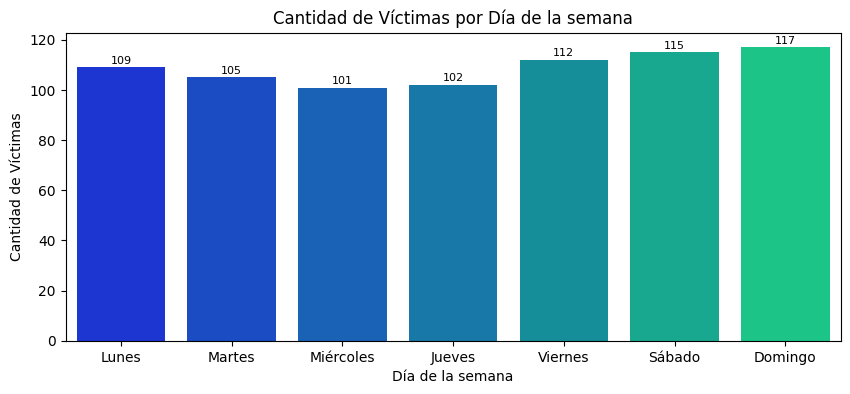

In [15]:
# Se agrupa por la cantidad de víctimas por día de la semana
data = siniestros.groupby(['Dia semana'])['Num_victimas'].sum().reset_index()

# Define el orden de los días de la semana
orden_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crea una columna 'Orden_semana' en el DataFrame para representar el orden numérico de los días de la semana
data['Orden_semana'] = data['Dia semana'].apply(lambda x: orden_semana.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='Orden_semana')

# Se grafica
plt.figure(figsize=(10, 4))

ax = sns.barplot(x='Dia semana', y='Num_victimas', data=data, palette="winter")
ax.set_title('Cantidad de Víctimas por Día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Realizo una distribucion para determinar las horas en las que hay mayor numero de victimas 

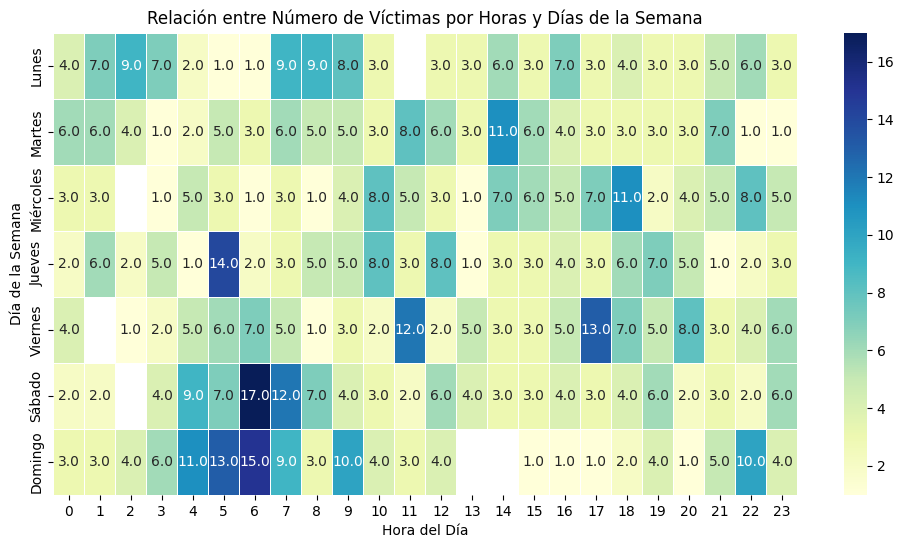

In [16]:
# Agrupa los datos en cantidad de víctimas por día de la semana y horas 
data = siniestros.groupby(['Dia semana', "Hora"])['Num_victimas'].sum().reset_index()

# Define el orden de los días de la semana
orden_dia_hora = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crea una columna 'orden_dia_hora' en el DataFrame para representar el orden numérico de los días de la semana
data['orden_dia_hora'] = data['Dia semana'].apply(lambda x: orden_dia_hora.index(x))

# Ordena el DataFrame según el orden numérico de los días de la semana
data = data.sort_values(by='orden_dia_hora')

# Crear una tabla pivot para los datos
pivot_data = data.pivot_table(index='Dia semana', columns='Hora', values='Num_victimas', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dia_hora)

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

# Configurar etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

# Mostrar el gráfico
plt.show()

La mayor concentración de víctimas por mes se observa en diciembre, con 87 casos. Esto podría deberse a las vacaciones y días festivos que caracterizan este período.

Los fines de semana muestran el mayor número de víctimas, posiblemente debido a la salida a fiestas y el regreso de madrugada, lo que puede llevar a situaciones de intoxicación. Este patrón también se refleja en las horas en que ocurren los siniestros. Además, los días laborables presentan casos, principalmente durante las horas de entrada y salida del trabajo, donde se registra un aumento en los homicidios.

Realizo una distribucion para determinar la edad de las victimas y su genero

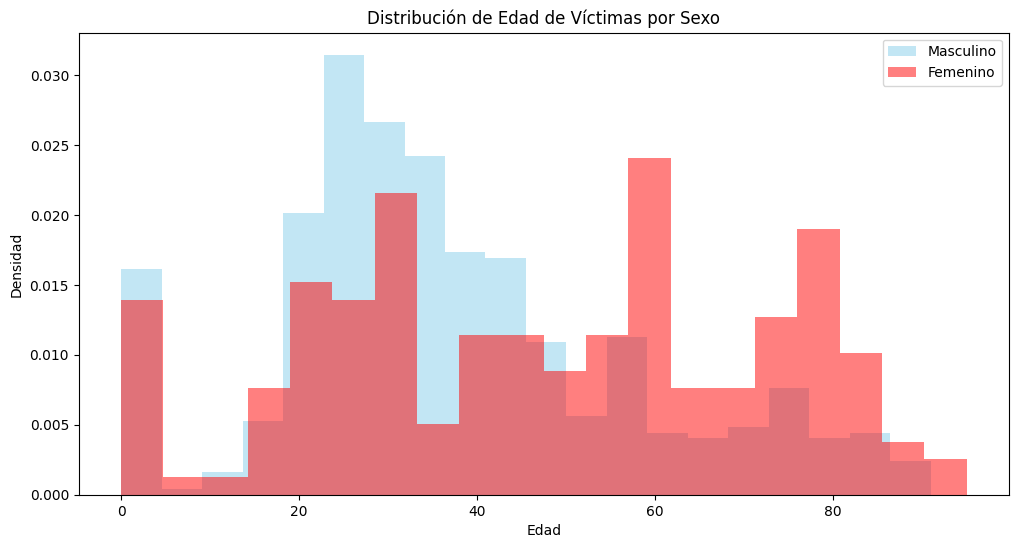

In [17]:
# Filtrar por sexo masculino
masculino = siniestros[siniestros['Sexo'] == 'MASCULINO']['Edad']

# Filtrar por sexo femenino
femenino = siniestros[siniestros['Sexo'] == 'FEMENINO']['Edad']

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Gracias a la fuente de información mencionada anteriormente y a este gráfico en particular, se evidencia una cantidad significativa de homicidios en hombres de entre 20 a 35 años. En los siguientes gráficos, se detallará la información sobre los roles que suelen cumplir las víctimas según su sexo.

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15040\3570344614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Edad', data=siniestros, palette="winter")


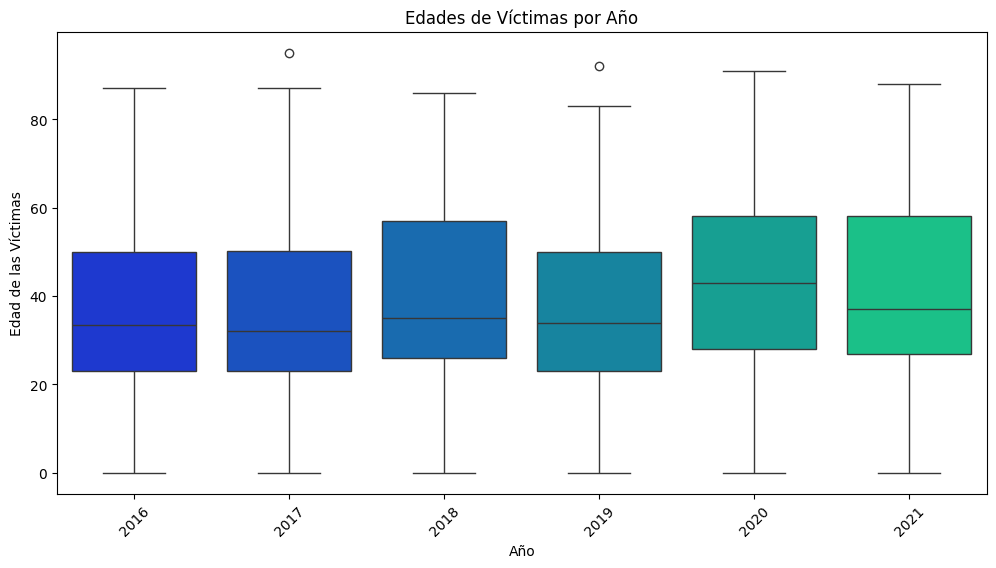

In [18]:
#Agrupa los datos en cantidad de victimas por edad y  año
data = siniestros.groupby(['Edad', "Año"])['Num_victimas'].sum().reset_index()

#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=siniestros, palette="winter")
plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
plt.xticks(rotation=45)
plt.show()

La media de edad de las victimas esta en torno a los 39 años.

c:\Users\pao_i\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

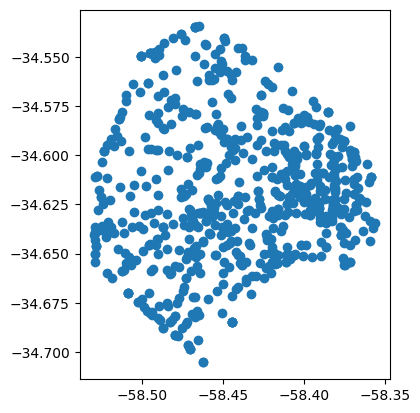

In [19]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(siniestros["Pos x"], siniestros["Pos y"])]
geodata=gpd.GeoDataFrame(siniestros,crs=crs, geometry=geometry)
geodata.plot()

Realizo un grafico para determinar los picos de victimas por comuna en una mapa de Buenos Aires

Text(158.98305973900304, 0.5, 'Latitud')

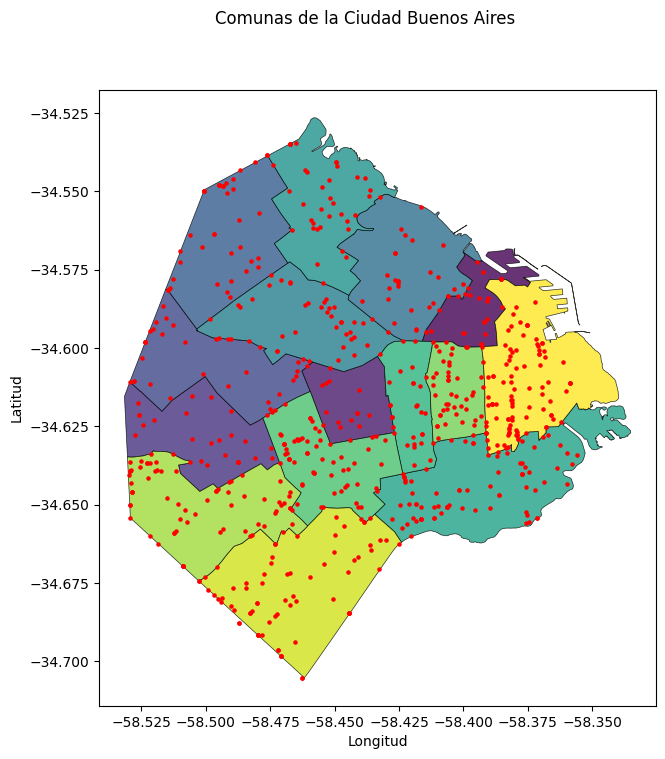

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
comuna.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")
geodata.plot(ax=ax, color='red', markersize=5);
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

La gráfica muestra la concentración de los puntos rojos representando siniestros con víctimas fatales, hacia la zona Este del mapa de CABA sobre la comuna 1 y 4

In [ ]:
#Se crea un dataset con el número de víctimas por Barrio y Comuna
Total_comunas=siniestros.groupby(["Comuna", "Barrios"])["Num_victimas"].sum().reset_index()
Total_comunas=Total_comunas.sort_values(by="Num_victimas", ascending=False)
Total_comunas

,Comuna,Barrios,Num_victimas
0,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101
9,Comuna 4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,85
14,Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,79
13,Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,71
12,Comuna 7,FLORES - PARQUE CHACABUCO,66
8,Comuna 3,BALVANERA - SAN CRISTOBAL,48
6,Comuna 15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
3,Comuna 12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43
5,Comuna 14,PALERMO,41
4,Comuna 13,BELGRANO - COLEGIALES - NUÃ‘EZ,40


El conjunto de datos incluye un total de 15 comunas que abarcan diversos barrios en la Ciudad Autónoma de Buenos Aires (CABA). Cada comuna está compuesta por uno o varios barrios.

Según la tabla "Total_comunas", las comunas con la mayor cantidad de víctimas fatales son la 1, 4, 9, 8 y 7. Se destaca que la comuna 1 lidera con una diferencia de 20 víctimas más que la comuna 4, que ocupa el segundo lugar en términos de incidencia de fatalidades.

Este patrón sugiere la posibilidad de que estos barrios posean avenidas o calles muy transitadas durante las horas pico de entrada o salida laboral. 

Determino numero de victimas por tipo de calle

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15884\1929914262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(siniestros, x='Tipo de calle', palette="winter")


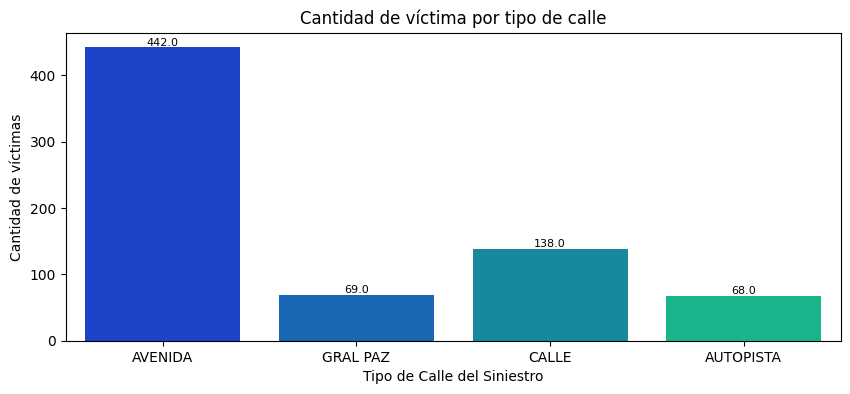

In [ ]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(siniestros, x='Tipo de calle', palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

Del análisis del gráfico resulta que el mayor número de víctimas fatales se producen en Avenida, seguido por Calle y ademas cuadra con la conclusion anterior

Destaco en una distribucion las victimas segun los participantes

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15884\478646217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(siniestros, x="Participantes", palette="winter")


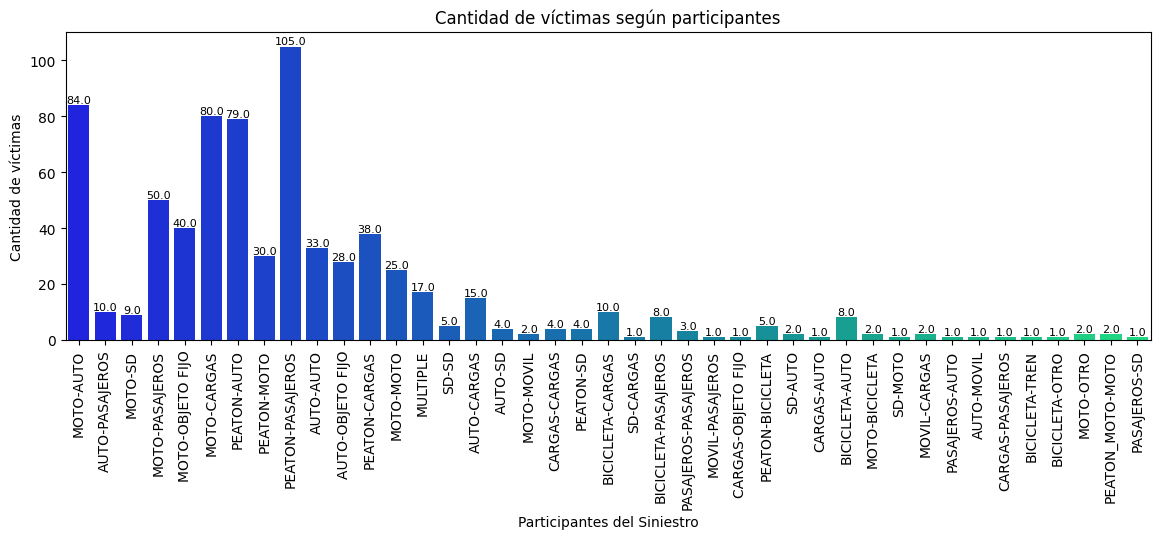

In [ ]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(siniestros, x="Participantes", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()



Los valores de participación que concentran un mayor número de víctimas corresponden a las categorías PEATON-PASAJEROS. Según el diccionario de datos, esto se refiere a Peatón como cualquier víctima que no sea ocupante de un vehículo, y Pasajero como cualquier persona dentro, descendiendo o ascendiendo de transporte público u omnibús de larga distancia.

Le siguen en importancia de víctimas las categorías MOTO-AUTO, PEATON-AUTO y MOTO-CARGAS.

En la columna "Participantes", se puede interpretar que la primera palabra está relacionada con la víctima, mientras que la segunda palabra se refiere al acusado. 

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15884\3956588683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(siniestros, x="Acusado", palette="winter")


Text(0.5, 1.0, 'Cantidad de víctimas según Acusado')

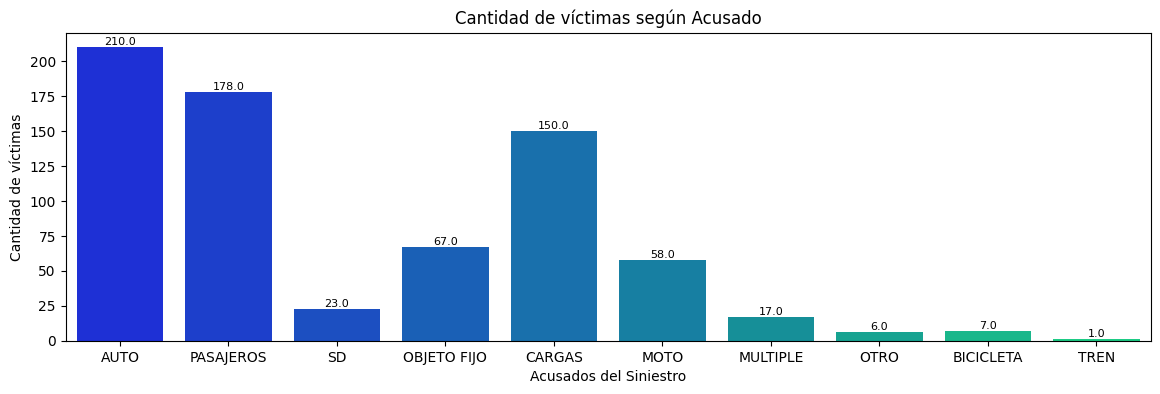

In [ ]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(siniestros, x="Acusado", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

Se puede visualizar que los que causan más víctimas son los Autos, Cargas y Pasajeros. Esto se relaciona con el punto anterior.

C:\Users\pao_i\AppData\Local\Temp\ipykernel_15884\2244832886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(siniestros, x="Victima", palette="winter")


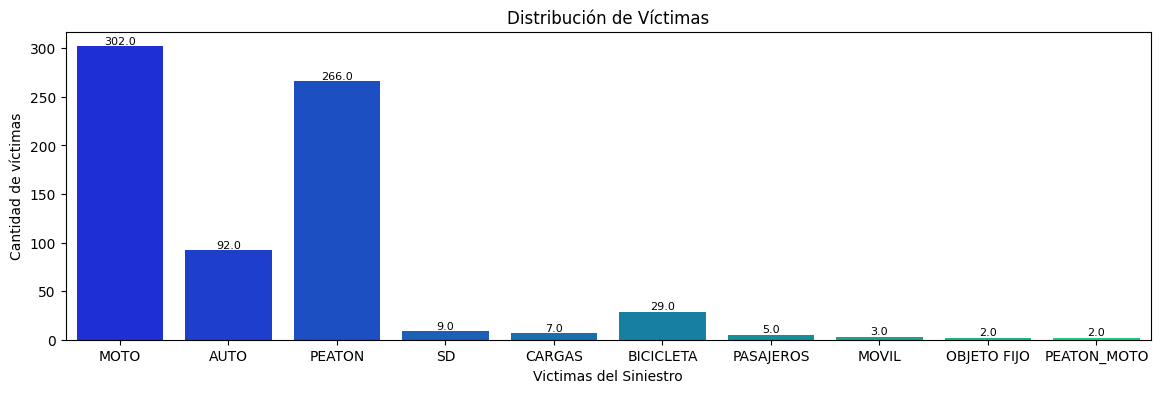

In [ ]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(siniestros, x="Victima", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

Se puede visualizar que las víctimas son Moto, Peaton y Carga. Esto se relaciona con ambos puntos anteriores.

Realizo un grafico de tipo torta para saber la proporcion de victimas segun el genero

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

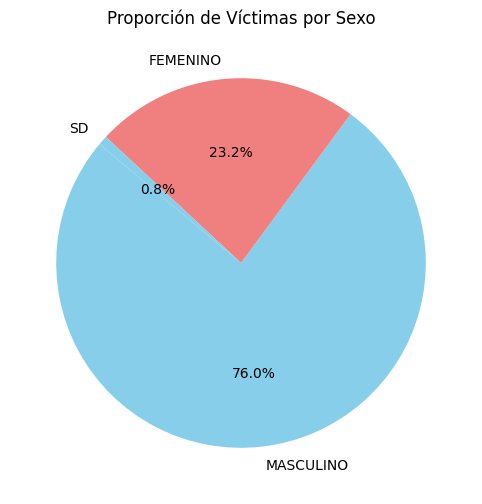

In [ ]:
# Calcular la proporción de víctimas por sexo
sexos = siniestros['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = sexos.index
sizes = sexos.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

Distribucion de barras para determinar los roles de las victimas segun el genero

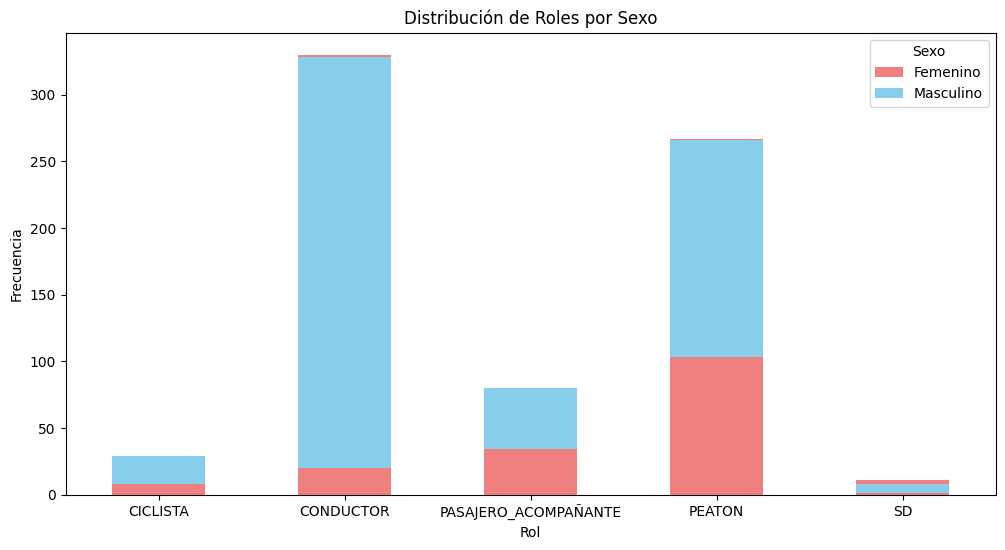

In [ ]:
# Crear una tabla de contingencia
tabla = pd.crosstab(siniestros['Rol'], siniestros['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

La distribución por roles de las víctimas revela que:

    En la mayoría de los siniestros, las víctimas desempeñan el rol de conductor, seguido por el rol de peatón.
    Para las víctimas de sexo masculino, el rol más común en los siniestros es el de conductor, seguido por el rol de peatón.
    En el caso de las víctimas de sexo femenino, el rol más frecuente en los siniestros es el de peatón, seguido por el rol de pasajero-acompañante.

Estos patrones proporcionan una perspectiva detallada sobre la distribución de roles en los incidentes viales, tanto en general como diferenciando por género.

Determino el numero de victimas segun su genero por tipo de vehiculo

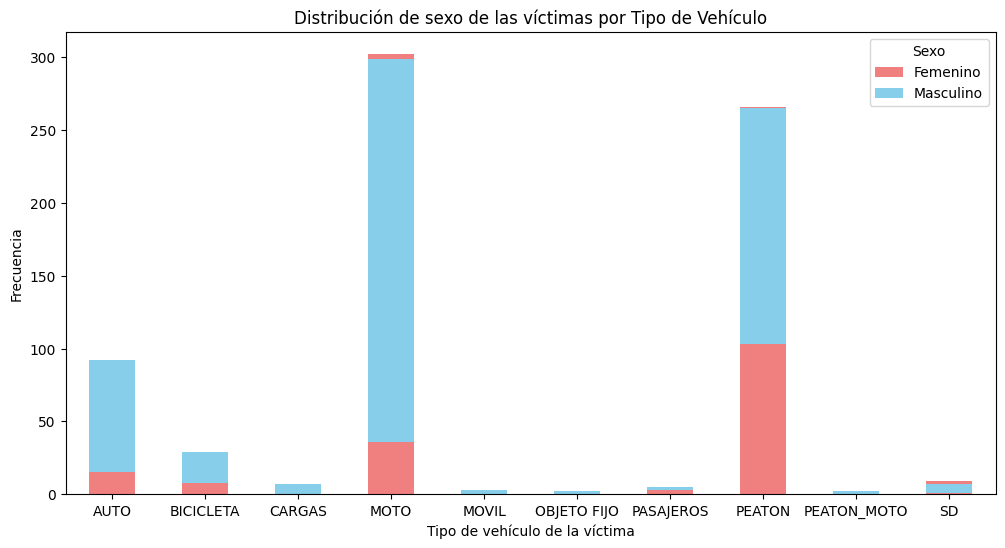

In [ ]:
# Crear una tabla de contingencia
tabla = pd.crosstab(siniestros['Victima'], siniestros['Sexo'])

# Crear un gráfico de barras apiladas
ax = tabla.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

La mayor cantidad de accidentes con víctimas fatales involucran a motociclistas, siendo este el grupo con mayor proporción de víctimas masculinas. En segundo lugar, se encuentran los peatones, donde también la mayoría de las víctimas son masculinas, aunque la diferencia en proporción es menor en comparación con el primer grupo.

In [ ]:
tabla = pd.crosstab(siniestros['Victima'], siniestros['Acusado'])

# Visualizar la tabla de contingencia
tabla

Acusado,AUTO,BICICLETA,CARGAS,MOTO,MULTIPLE,OBJETO FIJO,OTRO,PASAJEROS,SD,TREN
Victima,,,,,,,,,,
AUTO,33,0,15,0,3,26,1,10,4,0
BICICLETA,8,0,10,0,1,0,1,8,0,1
CARGAS,1,0,4,0,0,1,0,1,0,0
MOTO,84,2,80,25,8,40,4,50,9,0
MOVIL,0,0,2,0,0,0,0,1,0,0
OBJETO FIJO,2,0,0,0,0,0,0,0,0,0
PASAJEROS,1,0,0,0,0,0,0,3,1,0
PEATON,79,5,38,30,5,0,0,105,4,0
PEATON_MOTO,0,0,0,2,0,0,0,0,0,0


Aquí se evidencian de manera más clara los resultados de la intervención en cada siniestro:

    Cuando el acusado es un vehículo de tipo "Auto", la mayoría de las víctimas son autos, motos y peatones.
    En los casos donde el acusado es un vehículo de tipo "Cargas", las víctimas son diversas, destacándose especialmente motos y peatones.
    Si el acusado es de tipo "Pasajeros", las víctimas son principalmente peatones y motos.

Se observa que la frecuencia de víctimas entre motos y peatones es alta, y estas categorías están relacionadas con casi todos los tipos de acusados.

In [ ]:
siniestros.to_csv("siniestros_viales.csv",index=False)